In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [7]:
df=pd.read_csv("Dataset.csv")

In [588]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [590]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [591]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


from the descriptions we have known that the 

average balance is 1600

average balance_frequency 0.9 so we can use quantiles

average purchases 1000

average oneoff_purchases 600

Average purchases frequency is around 0.5

average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and 
CASH_ADVANCE_FREQUENCY are generally low

Average credit limit ~ 4500

Percent of full payment is 15%

Average tenure is 11 years


visualizing the row with the missing values to make sure of the appropriate way to handle the missing values


In [2]:
df['CREDIT_LIMIT'].hist()

NameError: name 'df' is not defined

In [3]:
df['MINIMUM_PAYMENTS'].hist()


NameError: name 'df' is not defined

sincse that both rows are skewed to the left the best way is to fill data with median since it is robost to outliers and skewed data 


In [4]:
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())

NameError: name 'df' is not defined

In [5]:
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median())

NameError: name 'df' is not defined

Exploratory analysis


In [596]:
df.apply(np.max)

CUST_ID                                  C19190
BALANCE                             19043.13856
BALANCE_FREQUENCY                           1.0
PURCHASES                              49039.57
ONEOFF_PURCHASES                       40761.25
INSTALLMENTS_PURCHASES                  22500.0
CASH_ADVANCE                        47137.21176
PURCHASES_FREQUENCY                         1.0
ONEOFF_PURCHASES_FREQUENCY                  1.0
PURCHASES_INSTALLMENTS_FREQUENCY            1.0
CASH_ADVANCE_FREQUENCY                      1.5
CASH_ADVANCE_TRX                            123
PURCHASES_TRX                               358
CREDIT_LIMIT                            30000.0
PAYMENTS                            50721.48336
MINIMUM_PAYMENTS                    76406.20752
PRC_FULL_PAYMENT                            1.0
TENURE                                       12
dtype: object

<Axes: xlabel='BALANCE', ylabel='Count'>

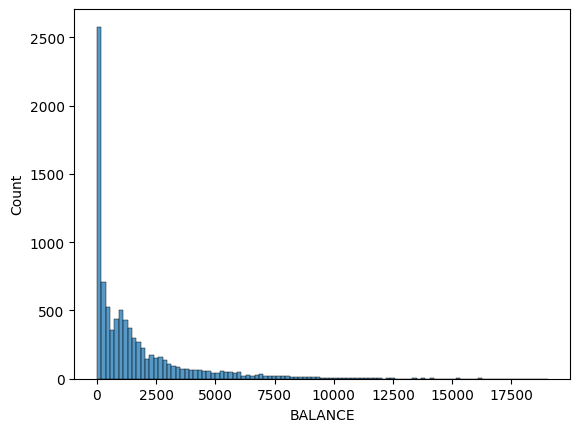

In [597]:
sns.histplot(df['BALANCE'])


In [598]:
# Let's see who made one off purchase of $40761!
df[df.ONEOFF_PURCHASES==df.ONEOFF_PURCHASES.max()]

#this customer has been in the bank for 12 years 
#his balance is = to 11550 his balance is regulary updated
#he has purchases with about 50000 with one single transaction by 40761 (high)
#he has made installments with 8278 and cash withdraws this 558
#he rarley takes out cash  from the credit card
#he usually make large ,single pruchases
#his total number of paymants to pay his credit card is 46930
#the minimum payment to cover his installement is 2974
#The percentage of months in which the customer has paid the full balance which will be quarter of the time 0.25%


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [599]:
# This customer made 123 cash advance transactions
# Never paid credit card in full
df[df.CASH_ADVANCE==df.CASH_ADVANCE.max() ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [600]:
#drop the custmer id cause it has no usage 
df.drop('CUST_ID', inplace=True, axis=1)

C:\Users\samas\AppData\Local\Temp\ipykernel_45828\3555581962.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
C:\Users\samas\AppData\Local\Temp\ipykernel_45828\3555581962.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

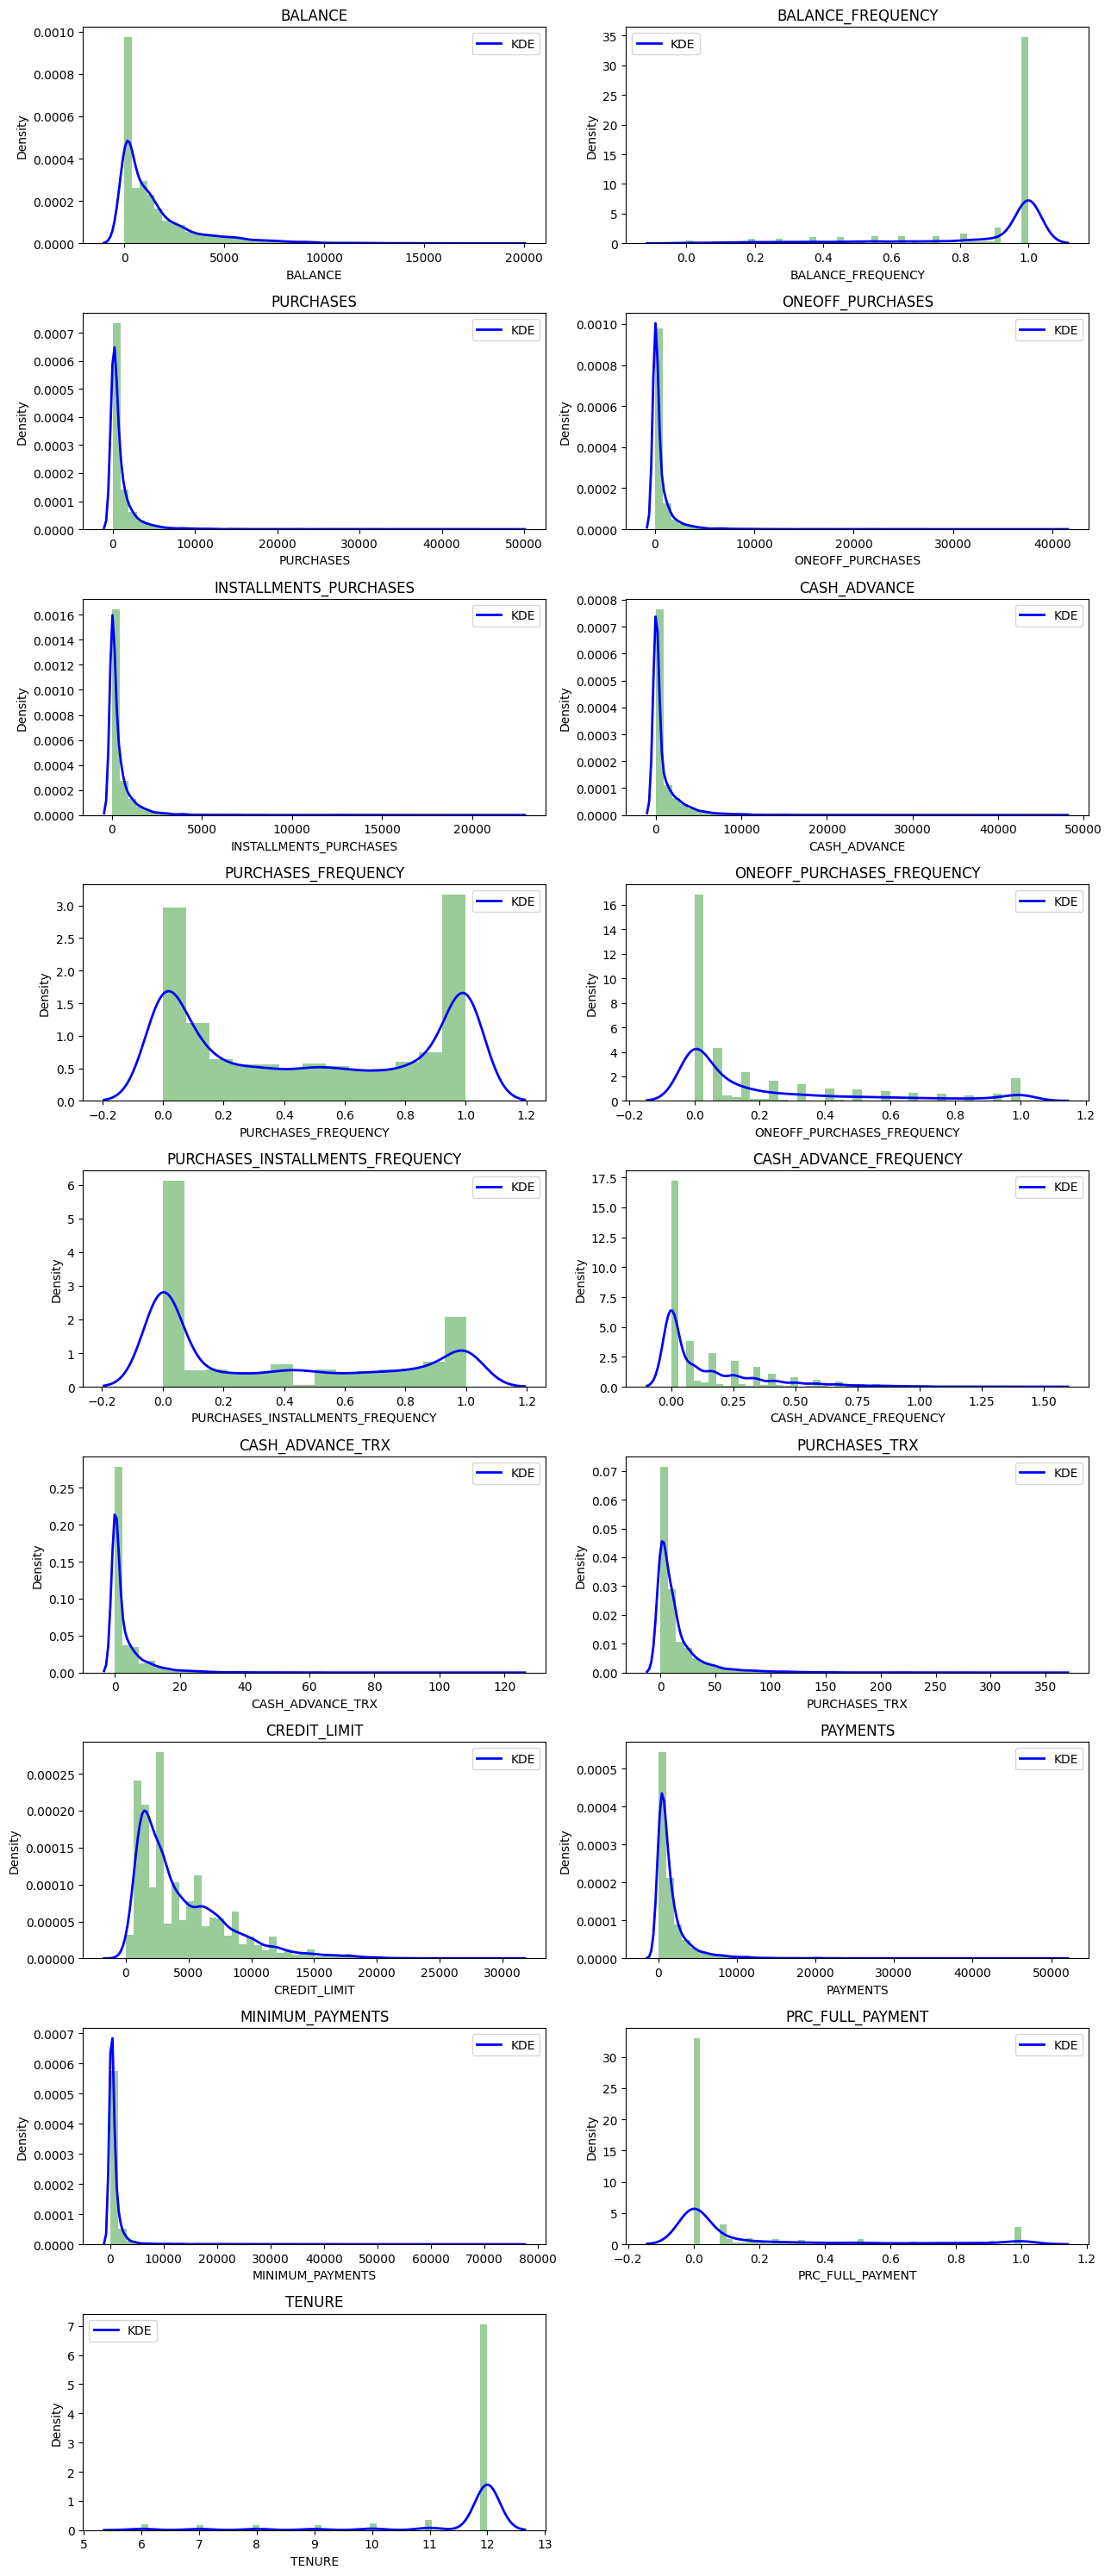

In [601]:
#making a figure to put the plots is
plt.figure(figsize=(13,30))

#this loop will iterate over the index of each columns till it reaches the end of each col
for i in range(len(df.columns)):
    
#creating a subplot that will be adjusted according to the number of the col in the data frame
  plt.subplot(len(df.columns)//2+1,2,i+1)
  
  sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
  plt.title(df.columns[i])
  plt.legend()
plt.tight_layout()


In [602]:
# all customers do regular updates to the credit card
# 0.8 % of the customers do purchases from the credit card
# we have 2 groups of customers in the purchase frequency a group 
# also we gave 2 groups of customers that install their purchases
# rare cusotomers pay their full installement every month
# most of the customers oays their minimum payments

In [680]:
df["Monthly_Cash_Advance"] =df["CASH_ADVANCE"]/df["TENURE"]

In [681]:
#since our tagret is to do a marketing strategy according to the transcations and payments we will need to know the monthly purchases that will represent and monthly installements
df["Monthly_Avg_Purchase"] = df["PURCHASES"]/df["TENURE"]
print("the monthly purchases of each costumer according to their tunre")
df["Monthly_Avg_Purchase"].head()


the monthly purchases of each costumer according to their tunre


0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Avg_Purchase, dtype: float64

In [682]:
#the type of purchases that is done
df.loc[:,["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


In [683]:
df["Balance_Credit_Ratio"] = df["BALANCE"]/df["CREDIT_LIMIT"]
df["Balance_Credit_Ratio"].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: Balance_Credit_Ratio, dtype: float64

In [684]:
#no we will need to know the total spending of each customer with there cash advance % an d thr installements % to know better the behavours of the customers
# Ensure no division by zero for customers who haven't made any purchases or cash advances
df['Total_Spending'] = df['PURCHASES'] + df['CASH_ADVANCE']

# Cash_Advance_Percent: Proportion of total spending that is a cash advance
df['Cash_Advance_Percent'] = np.where(df['Total_Spending'] == 0, 0, df['CASH_ADVANCE'] / df['Total_Spending'])

# Installments_Percent: Proportion of purchases made in installments
df['Installments_Percent'] = np.where(df['PURCHASES'] == 0, 0, df['INSTALLMENTS_PURCHASES'] / df['PURCHASES'])

# Check the results
df[['Cash_Advance_Percent', 'Installments_Percent']].tail()


,Cash_Advance_Percent,Installments_Percent
8945,0.000000,1.0
8946,0.000000,1.0
8947,0.000000,1.0
8948,1.000000,0.0
8949,0.104106,0.0


In [685]:
#this will show the purchase type wither it is one off or an installement during purchasing 
def type(x):    
    if (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("NONE")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("ONEOFF")
    elif (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("INSTALLMENTS")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("BOTH_ONEOFF_INSTALLMENTS")

In [686]:
df["Purchase_Type"] = df.apply(type,axis=1)
df["Purchase_Type"].value_counts()
#from this insights we have seen that large number of customers do both one_off and installements 

Purchase_Type
BOTH_ONEOFF_INSTALLMENTS    2774
INSTALLMENTS                2260
NONE                        2042
ONEOFF                      1874
Name: count, dtype: int64

In [688]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Cash_Advance', 'Monthly_Avg_Purchase',
       'Balance_Credit_Ratio', 'Total_Spending', 'Cash_Advance_Percent',
       'Installments_Percent', 'Purchase_Type', 'Total_Payment_Ratio'],
      dtype='object')

In [689]:
#we need to know the total payments
df["Total_Payment_Ratio"] = np.where(df["MINIMUM_PAYMENTS"] == 0,df["MINIMUM_PAYMENTS"], df["PAYMENTS"]/df["MINIMUM_PAYMENTS"])

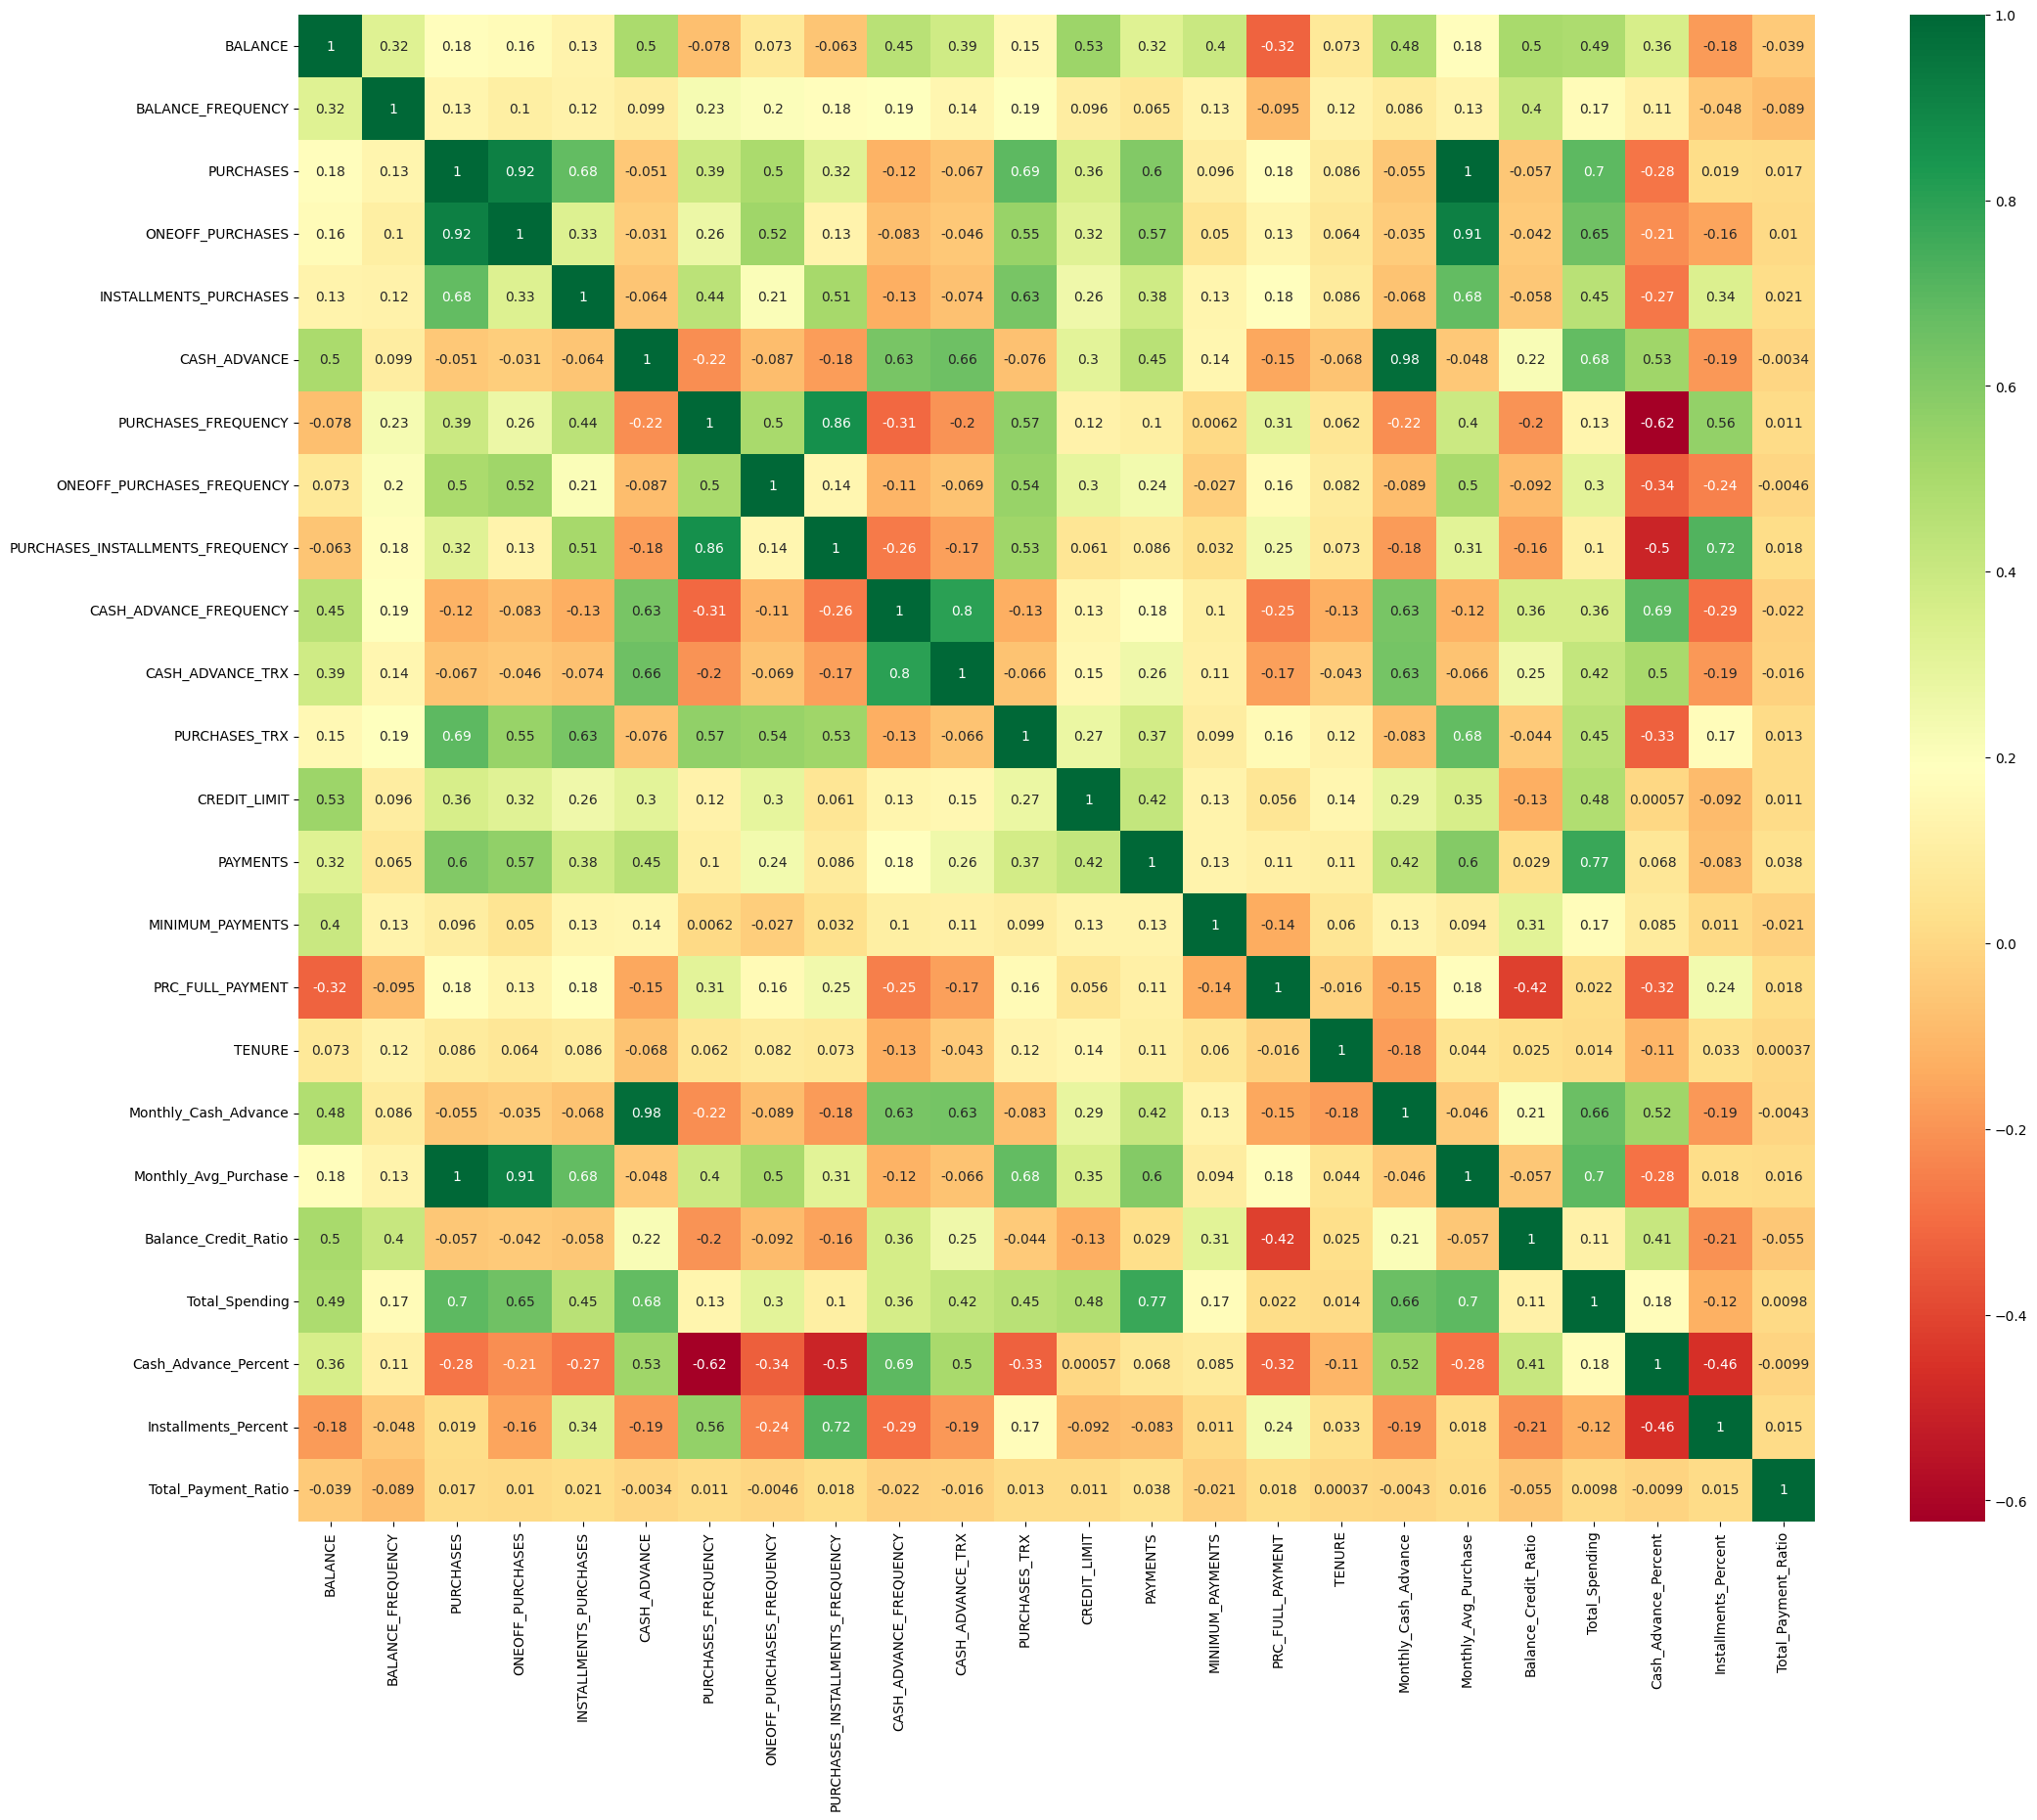

In [690]:
#the purchases have a strong correlation with "monthly_avg_purchases","total spending","payments","purchases_TRX","installement_purchases","oneofff_purchases"
#one_off purchases have strong correlation with the "monthly_avg_purchases"and with with the "total_spending"
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlations = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(25,20))
sns.heatmap(correlations, annot=True, cmap="RdYlGn")
plt.show()

In [691]:
#Average Total Payment Ratio  for each purchase type

x = df[["Purchase_Type","Total_Payment_Ratio"]].groupby(["Purchase_Type"]).agg("mean").reset_index()
x

,Purchase_Type,Total_Payment_Ratio
0,BOTH_ONEOFF_INSTALLMENTS,7.236982
1,INSTALLMENTS,13.259004
2,NONE,10.087451
3,ONEOFF,5.571082


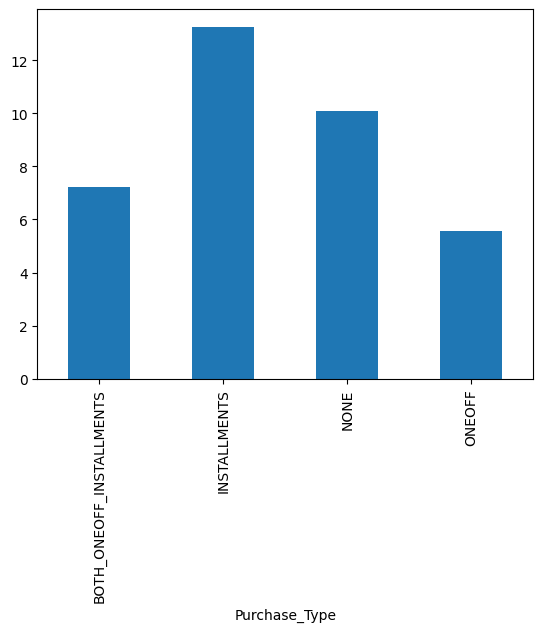

In [692]:
#checking the total payment ratio based on purchase type
df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Total_Payment_Ratio"])).plot.bar()
plt.show()

In [693]:
# we can notice that most of the customers do their purchases on installemnts 
# the second largest group dont make either one off payment nither installements


In [694]:
#creating segmentations to divide customers according to their burchases and balance in the credit card
pd.qcut(df['PURCHASES'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High']).head()



0     Medium-Low
1            Low
2    Medium-High
3           High
4            Low
Name: PURCHASES, dtype: category
Categories (4, object): ['Low' < 'Medium-Low' < 'Medium-High' < 'High']

In [695]:
pd.qcut(df["BALANCE"], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High']).head()

0            Low
1           High
2           High
3    Medium-High
4     Medium-Low
Name: BALANCE, dtype: category
Categories (4, object): ['Low' < 'Medium-Low' < 'Medium-High' < 'High']

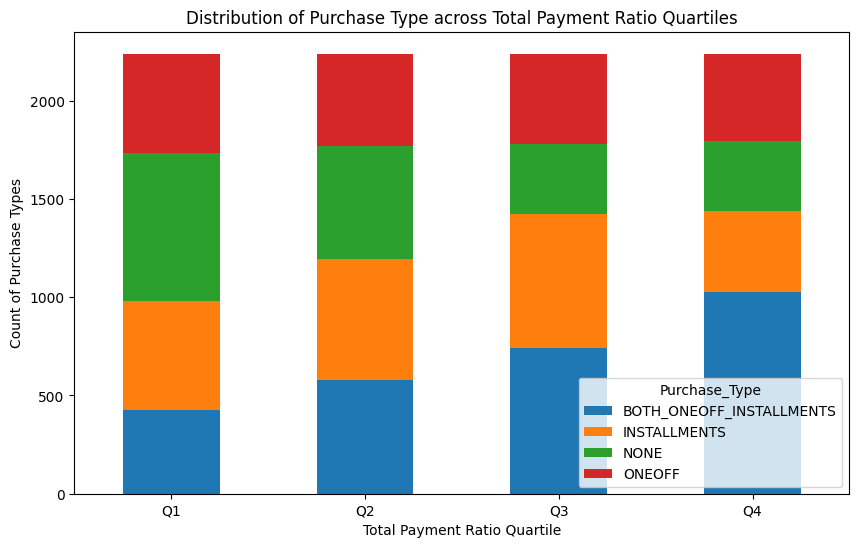

In [696]:

df['Payment_Ratio_Quartile'] = pd.qcut(df['Total_Payment_Ratio'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

#Group by quartile and Purchase_Type and calculate the size of each group
quartile_purchase_type = df.groupby(['Payment_Ratio_Quartile', 'Purchase_Type']).size().unstack()

#  Plot the distribution
quartile_purchase_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Purchase Type across Total Payment Ratio Quartiles')
plt.xlabel('Total Payment Ratio Quartile')
plt.ylabel('Count of Purchase Types')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


In [697]:
#Higher Quartiles (Q3, Q4): Dominated by customers using both one-off and installment purchases (BOTH_ONEOFF_INSTALLMENTS), indicating high payment activity relative to minimum payments.
#Installments: Increase slightly as we move to higher quartiles, showing a strong representation in Q3 and Q4.
#One-off Purchases: Less prominent across all quartiles, especially in higher ones.
#None (No Purchases): Decrease in higher quartiles, indicating that non-purchasers have lower payment ratios.

#so we can say that low quartiles needs to be promoted more about the creid card and the installements plan so they can use the credit card more
#we need high value customer with mixed purchases to have the high value offers

In [698]:
df.drop(columns="Payment_Ratio_Quartile",inplace=True,axis=1)

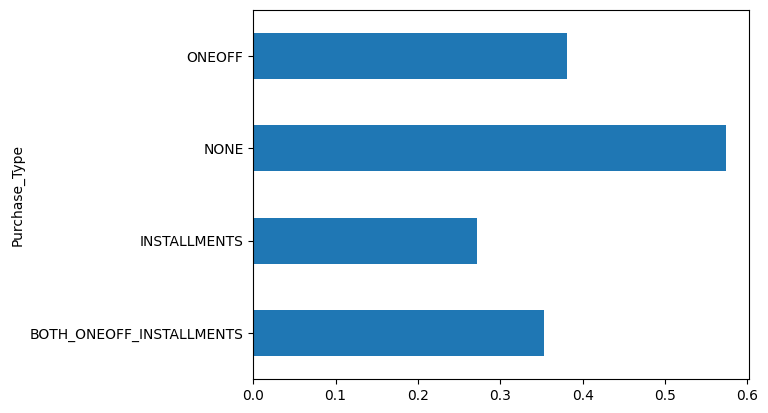

In [699]:
df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Balance_Credit_Ratio"])).plot.barh()
plt.show()
#we can see that the customers that have a good credit score is the customers that dont do both installlments noe cash

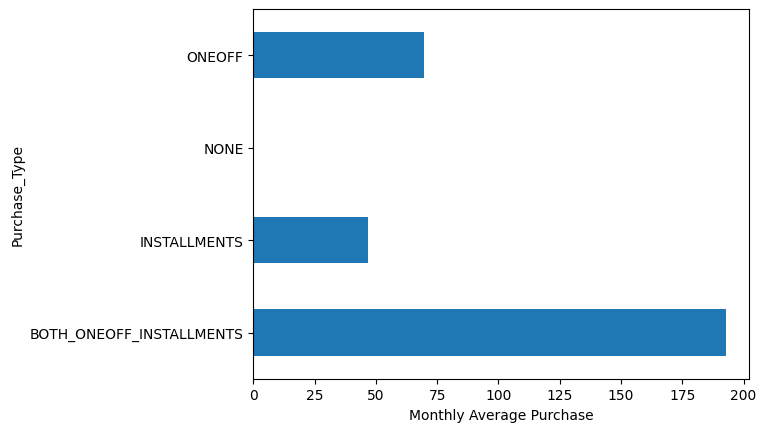

In [700]:
df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Monthly_Avg_Purchase"])).plot.barh()
plt.xlabel("Monthly Average Purchase")
plt.show()
#here we can see the monthly ourchases according to the type of purchases and what we can see that the most done burchases is in oneoff or in installement



In [702]:
df_numeric = df._get_numeric_data( )
names=list(df_numeric.columns)
names

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Cash_Advance',
 'Monthly_Avg_Purchase',
 'Balance_Credit_Ratio',
 'Total_Spending',
 'Cash_Advance_Percent',
 'Installments_Percent',
 'Total_Payment_Ratio']

In [703]:
credit_log = df_numeric.apply(lambda x: np.log(x + 1))
#we need to reduce the effect of outlies o the log transormation will help me to reduce the effect of the skewness happens in the data and be more like normal dist


In [704]:
credit_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Spending,Cash_Advance_Percent,Installments_Percent,Total_Payment_Ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,5.916079,0.117730,2.519680,2.163970,3.050877,0.296081,6.805642,0.272249,0.285192,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.169929,0.211617,0.130367,2.429741,2.002823,0.250303,1.385729,0.310872,0.300234,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,5.146667,0.000000,2.564949,0.000000,1.481458,0.040656,5.902206,0.000000,0.000000,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,5.747301,0.000000,2.564949,0.000000,3.494587,0.264455,6.972381,0.000000,0.169581,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,6.671670,0.133531,2.564949,4.606022,4.587295,0.540911,7.828159,0.669684,0.693147,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,11.243832,0.693147,2.564949,8.276166,8.315721,2.827902,10.811721,0.693147,1.377207,8.830767


In [705]:
# now we will see the catagoricaldata and convert it into numerical by getting dummies
catergorical= [x for x in list(df.columns) if x not in names]
catergorical

['Purchase_Type']

In [706]:
dummies = pd.get_dummies(df[catergorical]).astype(int)
dummies.head()

,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [707]:
pd.concat([df,dummies],axis=1).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Balance_Credit_Ratio,Total_Spending,Cash_Advance_Percent,Installments_Percent,Purchase_Type,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,95.400000,0.000000,1.0,INSTALLMENTS,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.457495,6442.945483,1.000000,0.0,NONE,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,773.170000,0.000000,0.0,ONEOFF,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,1704.788017,0.120712,0.0,ONEOFF,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,16.000000,0.000000,0.0,ONEOFF,2.771075,0,0,0,1


In [708]:
data_org = pd.concat([df,dummies],axis=1)

In [710]:
# Drop the non-numeric column 'Purchase_Type'
data_org_numeric = data_org.drop(columns=['Purchase_Type'])

# Now calculate the mean for the numeric columns
data_org_numeric.mean()



BALANCE                                   1564.474828
BALANCE_FREQUENCY                            0.877271
PURCHASES                                 1003.204834
ONEOFF_PURCHASES                           592.437371
INSTALLMENTS_PURCHASES                     411.067645
CASH_ADVANCE                               978.871112
PURCHASES_FREQUENCY                          0.490351
ONEOFF_PURCHASES_FREQUENCY                   0.202458
PURCHASES_INSTALLMENTS_FREQUENCY             0.364437
CASH_ADVANCE_FREQUENCY                       0.135144
CASH_ADVANCE_TRX                             3.248827
PURCHASES_TRX                               14.709832
CREDIT_LIMIT                              4494.282473
PAYMENTS                                  1733.143852
MINIMUM_PAYMENTS                           844.906767
PRC_FULL_PAYMENT                             0.153715
TENURE                                      11.517318
Monthly_Cash_Advance                        88.977984
Monthly_Avg_Purchase        

In [711]:
data_merged = pd.concat([credit_log,dummies],axis = 1)

In [712]:
#dropping the columns that was used to determine the payments and the credit card usages 
# List of columns to drop
var_names = [
    "BALANCE", 
    "PURCHASES", 
    "PAYMENTS", 
    "MINIMUM_PAYMENTS", 
    "PRC_FULL_PAYMENT", 
    "TENURE", 
    "CASH_ADVANCE", 
    "CREDIT_LIMIT"
]

data_new = data_merged[[x for x in data_merged.columns if x not in var_names]]

In [713]:
data_new.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Spending,Cash_Advance_Percent,Installments_Percent,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0.000000,2.191654,0.040086,4.568506,0.000000,0.693147,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,6.287695,0.000000,0.376719,8.770896,0.693147,0.000000,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0.000000,4.180994,0.287197,6.651791,0.000000,0.000000,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,2.898616,4.835620,0.200671,7.441782,0.113964,0.000000,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.000000,0.847298,0.519644,2.833213,0.000000,0.000000,1.327360,0,0,0,1


In [715]:
data_new.dtypes

BALANCE_FREQUENCY                         float64
ONEOFF_PURCHASES                          float64
INSTALLMENTS_PURCHASES                    float64
PURCHASES_FREQUENCY                       float64
ONEOFF_PURCHASES_FREQUENCY                float64
PURCHASES_INSTALLMENTS_FREQUENCY          float64
CASH_ADVANCE_FREQUENCY                    float64
CASH_ADVANCE_TRX                          float64
PURCHASES_TRX                             float64
Monthly_Cash_Advance                      float64
Monthly_Avg_Purchase                      float64
Balance_Credit_Ratio                      float64
Total_Spending                            float64
Cash_Advance_Percent                      float64
Installments_Percent                      float64
Total_Payment_Ratio                       float64
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS      int32
Purchase_Type_INSTALLMENTS                  int32
Purchase_Type_NONE                          int32
Purchase_Type_ONEOFF                        int32


In [716]:
from sklearn.preprocessing import StandardScaler
#Create an object

sc = StandardScaler()
data_scaled = sc.fit_transform(data_new)
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.858049e-16,0.000000,1.034058e-16,-1.794220e-16,-9.526830e-17,-1.047951e-16,-1.222610e-16,-5.795488e-17,1.397268e-16,1.270244e-17,-5.398537e-17,3.175610e-18,1.079707e-16,4.118369e-17,-5.398537e-17,-1.587805e-17,4.445854e-17,-6.986342e-17,5.160366e-17,-9.526830e-17
std,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-4.172393e+00,-0.987090,-1.087454e+00,-1.302799e+00,-7.324800e-01,-9.582565e-01,-7.243604e-01,-8.100687e-01,-1.379210e+00,-8.906674e-01,-1.523373e+00,-1.182957e+00,-4.911509e+00,-8.758087e-01,-9.499532e-01,-1.444107e+00,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
25%,1.080159e-01,-0.987090,-1.087454e+00,-1.014151e+00,-7.324800e-01,-9.582565e-01,-7.243604e-01,-8.100687e-01,-8.746552e-01,-8.906674e-01,-7.836472e-01,-1.020520e+00,-6.519938e-01,-8.758087e-01,-9.499532e-01,-7.539472e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
50%,4.927100e-01,0.141485,3.721960e-01,1.593847e-01,-3.630419e-01,-4.113045e-01,-7.243604e-01,-8.100687e-01,1.344545e-01,-8.906674e-01,2.215546e-01,-1.263592e-01,1.203328e-01,-8.758087e-01,-3.850934e-01,-2.639529e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
75%,4.927100e-01,0.972218,9.081215e-01,1.043343e+00,4.784703e-01,1.027349e+00,5.561843e-01,7.846025e-01,7.247459e-01,1.005123e+00,7.671691e-01,9.781908e-01,7.379323e-01,1.278523e+00,1.358865e+00,6.337802e-01,1.492109e+00,1.720516e+00,-5.436904e-01,-5.146250e-01
max,4.927100e-01,2.283062,2.163264e+00,1.196820e+00,2.466762e+00,1.501139e+00,5.122793e+00,3.965987e+00,2.903371e+00,2.515715e+00,2.628859e+00,1.011559e+01,2.891115e+00,1.354001e+00,3.637415e+00,7.949360e+00,1.492109e+00,1.720516e+00,1.839282e+00,1.943162e+00


In [717]:
from sklearn.decomposition import PCA

In [718]:
#applying the PCA to find the number of factors

variance_ratio = {}
for n in range(2,18):
    pc = PCA(n_components=n)
    cr_pca = pc.fit(data_scaled)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)

In [719]:
#ratio of variance explained 
variance_ratio

{2: 0.5892038504188637,
 3: 0.7387069826487486,
 4: 0.8118269632205016,
 5: 0.8710458877731512,
 6: 0.9078202814377824,
 7: 0.9282253343126078,
 8: 0.9477670062650755,
 9: 0.9636696552059434,
 10: 0.9745042095066908,
 11: 0.9838175274507347,
 12: 0.9872879367804408,
 13: 0.9901654372982872,
 14: 0.9927453158089427,
 15: 0.9949791049162312,
 16: 0.9971020927220586,
 17: 0.9986872247424319}

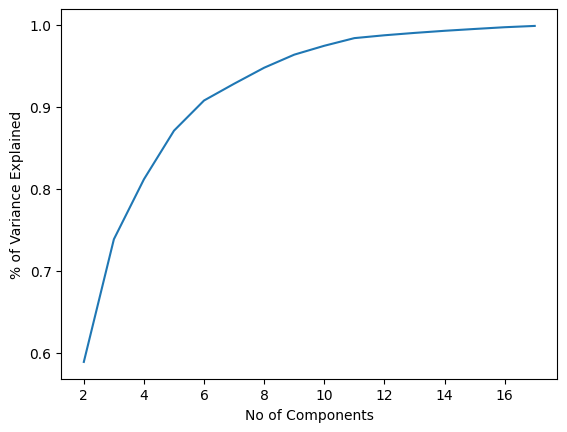

In [720]:
#plotting the graph

pd.Series(variance_ratio).plot()
plt.xlabel("No of Components")
plt.ylabel("% of Variance Explained")
plt.show()


In [721]:
#we can see that 5th components can explain 88% of the data

In [722]:
final_pc = PCA(n_components=5).fit(data_scaled)

reduced = final_pc.fit_transform(data_scaled)

In [723]:
data_scaled.shape

(8950, 20)

In [724]:
#after doing pca we got 5 components
reduced.shape

(8950, 5)

In [725]:
column_names = data_new.columns
column_names

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Cash_Advance',
       'Monthly_Avg_Purchase', 'Balance_Credit_Ratio', 'Total_Spending',
       'Cash_Advance_Percent', 'Installments_Percent', 'Total_Payment_Ratio',
       'Purchase_Type_BOTH_ONEOFF_INSTALLMENTS', 'Purchase_Type_INSTALLMENTS',
       'Purchase_Type_NONE', 'Purchase_Type_ONEOFF'],
      dtype='object')

In [726]:
pd.DataFrame(final_pc.explained_variance_ratio_,columns=["Variance Ratio"],index=["PC_" + str(i) for i in range(5)])

,Variance Ratio
PC_0,0.395134
PC_1,0.194070
PC_2,0.149503
PC_3,0.073120
PC_4,0.059219


FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD


In [727]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(data_scaled)
  wcss_values.append(kmeans.inertia_)
     

C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

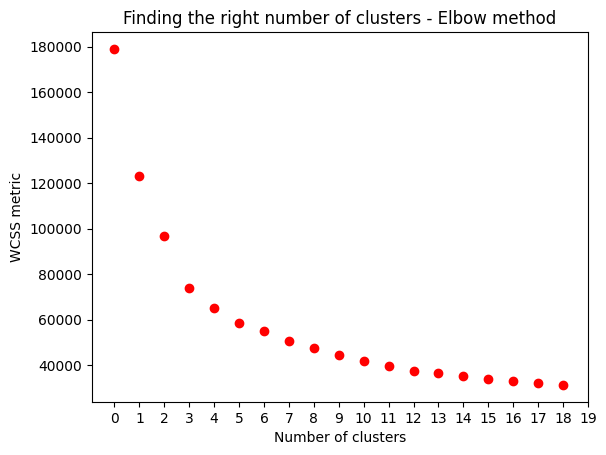

In [728]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()

In [729]:
#in this graph we can see that the 4th number of cluster is the elbow and the grapgh doesnt get to be linear until the 9th cluster but we can be sure from it from Silhouette coef

In [730]:
scores = []
inertia = []
k_range = range(3, 12)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))
    inertia.append(km.inertia_)

C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

In [731]:
scores

[0.31801524046287266,
 0.36900808393541257,
 0.36607559938998174,
 0.36219887150652796,
 0.33443352117093617,
 0.3379406626602829,
 0.2939389564105013,
 0.27412591222473115,
 0.2715312076848325]

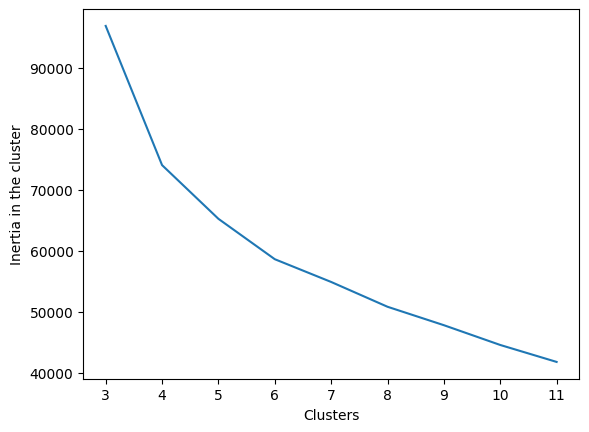

In [732]:
plt.plot(k_range,inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

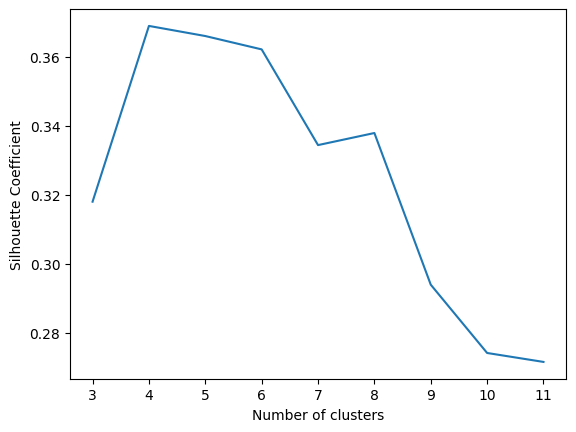

In [733]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [734]:
#from the graph we have observed that the optimal nmber of clusters is 4 or 6 where the highest peaks exists
#so we will do clusterin for k=6 and k=4 and compare between them

In [735]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [736]:
km_4.fit(reduced)
km_4.labels_

C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 2, ..., 1, 0, 2])

In [737]:
# we want to observe the number of customers in each cluster
pd.Series(km_4.labels_).value_counts()

3    2721
1    2260
0    2122
2    1847
Name: count, dtype: int64

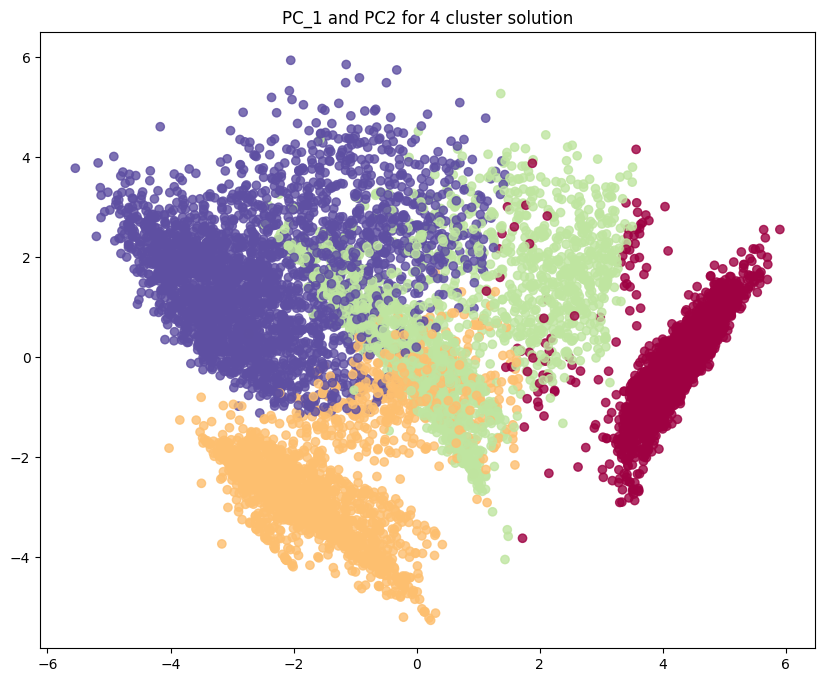

In [738]:
plt.figure(figsize=(10, 8 ))
plt.scatter(reduced[:, 0], reduced[:, 1], c = km_4.labels_, cmap = "Spectral", alpha = 0.8)
plt.title("PC_1 and PC2 for 4 cluster solution")
plt.show()

In [739]:
col_key_kpi = ["PURCHASES_TRX","Monthly_Avg_Purchase","Monthly_Cash_Advance","Balance_Credit_Ratio","CASH_ADVANCE_TRX","Total_Payment_Ratio","Purchase_Type_INSTALLMENTS","Purchase_Type_NONE","Purchase_Type_BOTH_ONEOFF_INSTALLMENTS","Purchase_Type_ONEOFF","CREDIT_LIMIT"]

In [740]:
#making a dataframe with 4 cluster solution labels

cluster_df_4 = pd.concat([data_org_numeric[col_key_kpi], pd.Series(km_4.labels_,name="Cluster_4")], axis =1)
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,1,0,0,0,1000.0,1
1,0,0.000000,536.912124,0.457495,4,3.826241,0,1,0,0,7000.0,0
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,0,1,7500.0,2
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,0,1,7500.0,2
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,0,1,1200.0,2


In [741]:
col_key_kpi = ["PURCHASES_TRX","Monthly_Avg_Purchase","Monthly_Cash_Advance","Balance_Credit_Ratio","CASH_ADVANCE_TRX","Total_Payment_Ratio","Purchase_Type_INSTALLMENTS","Purchase_Type_NONE","Purchase_Type_BOTH_ONEOFF_INSTALLMENTS","Purchase_Type_ONEOFF","CREDIT_LIMIT"]

In [742]:

#making a dataframe with 4 cluster solution labels

cluster_df_4 = pd.concat([data_org_numeric[col_key_kpi], pd.Series(km_4.labels_,name="Cluster_4")], axis =1)

In [744]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,1,0,0,0,1000.0,1
1,0,0.000000,536.912124,0.457495,4,3.826241,0,1,0,0,7000.0,0
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,0,1,7500.0,2
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,0,1,7500.0,2
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,0,1,1200.0,2


In [745]:
cluster_4 = cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_key_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,0.072102,11.959292,7.206280,33.503124
Monthly_Avg_Purchase,0.311294,47.145139,70.705646,196.055086
Monthly_Cash_Advance,189.622048,32.616551,73.370036,67.896768
Balance_Credit_Ratio,0.577058,0.261993,0.374587,0.357230
CASH_ADVANCE_TRX,6.759661,1.007080,2.591770,2.818817
Total_Payment_Ratio,9.830714,13.251645,5.596363,7.325815
Purchase_Type_INSTALLMENTS,0.016494,0.984513,0.000000,0.000000
Purchase_Type_NONE,0.962300,0.000000,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.005184,0.015487,0.003790,1.000000
Purchase_Type_ONEOFF,0.016023,0.000000,0.996210,0.000000


In [746]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [747]:
ClusterPercentage(cluster_df_4,"Cluster_4")

,Cluster_Size,Cluster_Percentage
Cluster_4,,
0,2122,23.71
1,2260,25.25
2,1847,20.64
3,2721,30.40


In [748]:
cluster_4_T = cluster_4.T
cluster_4_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_4,,,,,,,,,,,
0,0.072102,0.311294,189.622048,0.577058,6.759661,9.830714,0.016494,0.9623,0.005184,0.016023,4097.486648
1,11.959292,47.145139,32.616551,0.261993,1.007080,13.251645,0.984513,0.0000,0.015487,0.000000,3351.629816
2,7.206280,70.705646,73.370036,0.374587,2.591770,5.596363,0.000000,0.0000,0.003790,0.996210,4491.356335
3,33.503124,196.055086,67.896768,0.357230,2.818817,7.325815,0.000000,0.0000,1.000000,0.000000,5754.775057


In [749]:
def ClusterAnalysis(datafr):
    """A function to analyze the KPI variables across each segment in the cluster and returns dataframe useful for plotting"""
    
    #Build a dataframe of KPI for each cluster suitable for plotting
    n = datafr.shape[0]
    
    balance_crdt_ratio = pd.Series(datafr.reset_index(drop = True)["Balance_Credit_Ratio"])
    mn_avg_purchases = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Avg_Purchase"]))
    total_pymnt_ratio = pd.Series(datafr.reset_index(drop = True)["Total_Payment_Ratio"])
    installment = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_INSTALLMENTS"])
    oneoff = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_ONEOFF"])

    final_df = pd.concat([mn_avg_purchases,balance_crdt_ratio,total_pymnt_ratio,installment,oneoff],axis=1)
    final_df.columns=["Monthly_Avg_Purchase","Balance_Credit_Ratio","Total_Payment_Ratio","Installments","Oneoff"]
    final_df.index = ["Cl-"+ str(i) for i in range(n)]
    return(final_df)
    

In [750]:
final_df_4 = ClusterAnalysis(cluster_4_T)
final_df_4

,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,-1.167017,0.577058,9.830714,0.016494,0.016023
Cl-1,3.853231,0.261993,13.251645,0.984513,0.000000
Cl-2,4.258525,0.374587,5.596363,0.000000,0.996210
Cl-3,5.278396,0.357230,7.325815,0.000000,0.000000


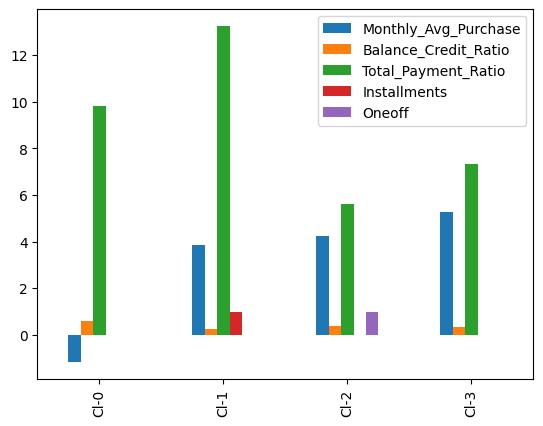

In [751]:
final_df_4.plot(kind = "bar")
#plt.xticks(["11","22","33","44"])
plt.show()

-cluster 1 have the highest installements purchases which is about 25% of the customers

-Cluster 3 is the group of customers who have the highest Montly Average Purchases. This group is about 30% of the total customer base
- Cluster 2 customers are doing maximum one off payments and least total payment ratio. This group is about 20% of the total customer base - 
Cluster 1 customers have lowest balance to credit ratio (good credit score) and are paying dues also doing maximum installment purchases. **This group is about 25% of the total customer base** 
- Cluster 0 customers are taking maximum advance cash and has high debt to credit ratio (poor credit rating) & not doing any purchase transcation.**This group is about 23% of the total customer base**

In [752]:
km_6 = KMeans(n_clusters=6,random_state=123)
km_6.fit(reduced)

C:\Users\samas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=123)

In [753]:
km_6.labels_

array([5, 1, 3, ..., 5, 1, 0])

In [754]:
pd.Series(km_6.labels_).value_counts()
#determines the number of customers in each label

1    2048
4    2034
5    1959
3    1201
2    1019
0     689
Name: count, dtype: int64

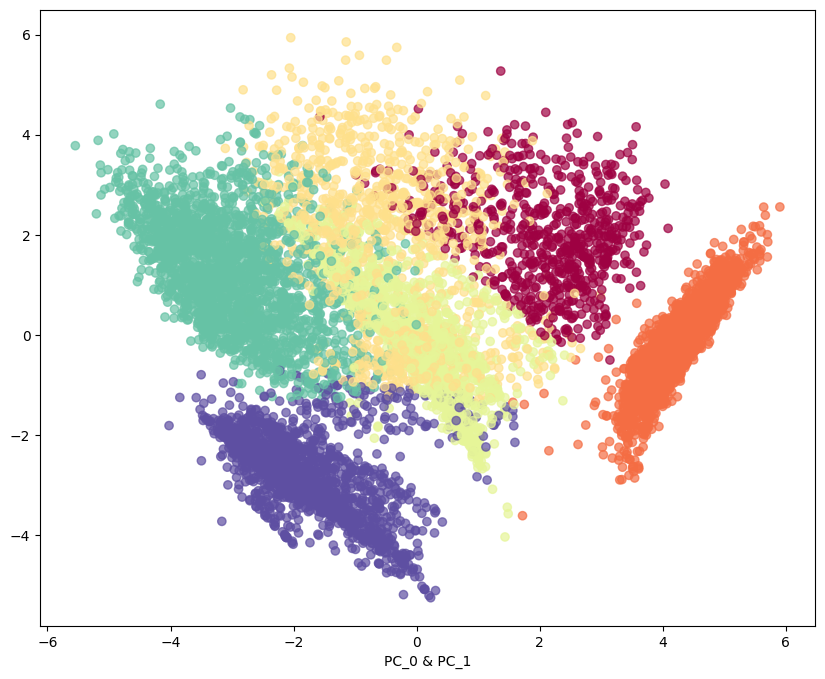

In [755]:
plt.figure(figsize=(10,8))
plt.scatter(reduced[:,0],reduced[:,1],c=km_6.labels_,cmap="Spectral",alpha = 0.7)
plt.xlabel("PC_0 & PC_1")
plt.show()

In [756]:
cluster_df_6 = pd.concat([data_org_numeric[col_key_kpi],pd.Series(km_6.labels_,name="Cluster_5")], axis = 1)
cluster_df_6.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_5
0,2,7.950000,0.000000,0.040901,0,1.446508,1,0,0,0,1000.0,5
1,0,0.000000,536.912124,0.457495,4,3.826241,0,1,0,0,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,0,1,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,0,1,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,0,1,1200.0,3


In [757]:
cluster_6 = cluster_df_6.groupby("Cluster_5").apply(lambda x: x[col_key_kpi].mean()).T
cluster_6

Cluster_5,0,1,2,3,4,5
PURCHASES_TRX,6.246734,0.003906,23.239450,7.557036,35.253196,11.678918
Monthly_Avg_Purchase,59.840222,0.004296,111.803890,74.680670,214.128050,46.387434
Monthly_Cash_Advance,212.019595,182.826110,249.355307,1.703513,6.245475,3.573919
Balance_Credit_Ratio,0.583171,0.573903,0.620650,0.262329,0.272511,0.204984
CASH_ADVANCE_TRX,7.767779,6.297363,9.717370,0.124063,0.262045,0.124553
Total_Payment_Ratio,3.939843,10.067853,3.508019,6.461897,8.515756,14.849182
Purchase_Type_INSTALLMENTS,0.000000,0.002930,0.301276,0.000000,0.000000,0.993874
Purchase_Type_NONE,0.000000,0.997070,0.000000,0.000000,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.000000,0.000000,0.698724,0.013322,1.000000,0.006126
Purchase_Type_ONEOFF,1.000000,0.000000,0.000000,0.986678,0.000000,0.000000


In [758]:
#transposing the cluster
cluster_6_T = cluster_6.T
cluster_6_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_5,,,,,,,,,,,
0,6.246734,59.840222,212.019595,0.583171,7.767779,3.939843,0.000000,0.00000,0.000000,1.000000,4726.523288
1,0.003906,0.004296,182.826110,0.573903,6.297363,10.067853,0.002930,0.99707,0.000000,0.000000,4029.036458
2,23.239450,111.803890,249.355307,0.620650,9.717370,3.508019,0.301276,0.00000,0.698724,0.000000,5520.755643
3,7.557036,74.680670,1.703513,0.262329,0.124063,6.461897,0.000000,0.00000,0.013322,0.986678,4397.677441
4,35.253196,214.128050,6.245475,0.272511,0.262045,8.515756,0.000000,0.00000,1.000000,0.000000,5733.723171
5,11.678918,46.387434,3.573919,0.204984,0.124553,14.849182,0.993874,0.00000,0.006126,0.000000,3137.383044


In [759]:
ClusterPercentage(cluster_df_6,"Cluster_5")

,Cluster_Size,Cluster_Percentage
Cluster_5,,
0,689,7.70
1,2048,22.88
2,1019,11.39
3,1201,13.42
4,2034,22.73
5,1959,21.89


In [760]:
final_df_6= ClusterAnalysis(cluster_6_T)
final_df_6

,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,4.091678,0.583171,3.939843,0.000000,1.000000
Cl-1,-5.449962,0.573903,10.067853,0.002930,0.000000
Cl-2,4.716746,0.620650,3.508019,0.301276,0.000000
Cl-3,4.313221,0.262329,6.461897,0.000000,0.986678
Cl-4,5.366574,0.272511,8.515756,0.000000,0.000000
Cl-5,3.837029,0.204984,14.849182,0.993874,0.000000


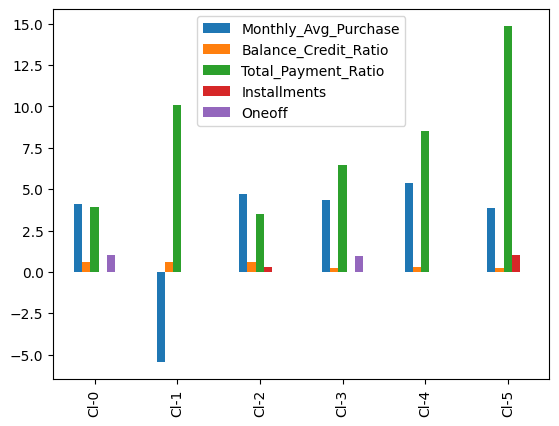

In [761]:
final_df_6.plot(kind = "bar")

plt.show()

we can see that cluster 5 have the highest purchases with installements which represents 25% of the avaliable customers 
and cluster 2 with the highest balance to credit ratio which represents 22% of the customers which tells that they have low credit score
and cluster 0 and 3 with the highest one_off purchases which represents around 20% of the customers

for the marketing strategy for the 4 clusters

group 0: offers the highest credit scores but the minimum usage in purchases so they need to be promoted to the advantages of the credit card and reminders for the payments to improve the payment rate

group 1: offers the  highest payment ratios that they [ay their bills and also making purchases wiht installements So we can increase credit limit or can lower down interest rate. Promote premium cards/loyality cars to increase transcations.

group 2 :offers the highest one_off purchase.so they could be offered discount on their large one off purchases or getting cashbacks

group 3 : acting the best among the clusters with the highest monthly purchasesso we can offer the points to purchase more or even gifts on each purchase

In [801]:
eps = 0.9
min_samples = 10
metric = 'euclidean'
metric_params = None
algorithm = 'auto'
leaf_size = 30
p = None
n_jobs = None

# DBSCAN Model Definition and Initiation
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, 
                metric_params=metric_params, algorithm=algorithm, 
                leaf_size=leaf_size, p=p, n_jobs=n_jobs)

print("Execution Completed")

Execution Completed


In [802]:
# DBSCAN Model Fitting

#dbscan.fit(raw_data_pca_df)
dbscan.fit(reduced)

print("Execution Completed")

Execution Completed


In [803]:
# Extracting the Cluster Labels

pred_labels = dbscan.labels_

pred_labels

array([0, 1, 2, ..., 0, 1, 2], dtype=int64)

In [804]:
# Experiment with different values for eps and min_samples
eps_values = [0.3, 0.5, 0.7,0.9]  
min_samples_values = [3, 5, 10]  

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        pred_labels = dbscan.fit_predict(reduced)

        # Count total number of clusters (excluding noise)
        total_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
        print(f"eps: {eps}, min_samples: {min_samples}, Total Number of Clusters: {total_clusters}")

eps: 0.3, min_samples: 3, Total Number of Clusters: 193
eps: 0.3, min_samples: 5, Total Number of Clusters: 81
eps: 0.3, min_samples: 10, Total Number of Clusters: 31
eps: 0.5, min_samples: 3, Total Number of Clusters: 88
eps: 0.5, min_samples: 5, Total Number of Clusters: 44
eps: 0.5, min_samples: 10, Total Number of Clusters: 20
eps: 0.7, min_samples: 3, Total Number of Clusters: 13
eps: 0.7, min_samples: 5, Total Number of Clusters: 10
eps: 0.7, min_samples: 10, Total Number of Clusters: 9
eps: 0.9, min_samples: 3, Total Number of Clusters: 8
eps: 0.9, min_samples: 5, Total Number of Clusters: 5
eps: 0.9, min_samples: 10, Total Number of Clusters: 5


In [805]:
# Count of the Total Number of Clusters
total_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

print("Total Number of Clusters: ", total_clusters)

Total Number of Clusters:  5


In [806]:
# Extracting the Sample Count in Each Cluster

cluster_sample_count = np.bincount(pred_labels[pred_labels >=0])

print("Total Samples in Each Cluster:", cluster_sample_count)

Total Samples in Each Cluster: [2213 2033 1824 2671    8]


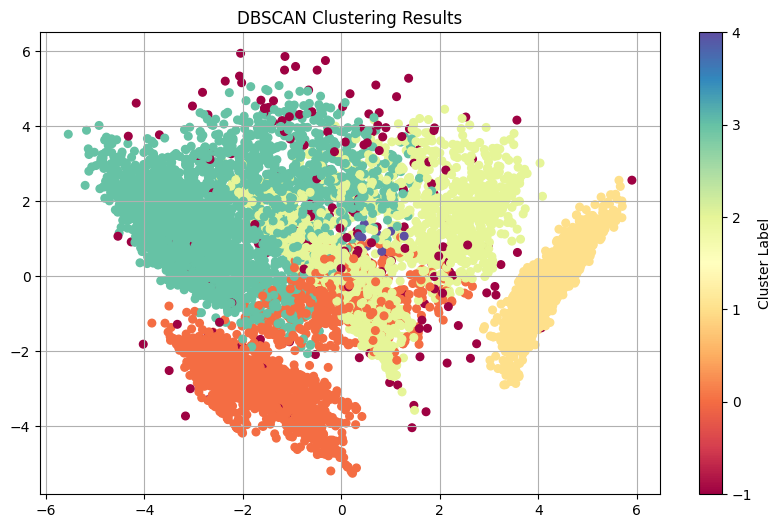

In [838]:
plt.figure(figsize=(10, 6))
# Create a scatter plot
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=pred_labels, cmap='Spectral', s=30)

# Add a color bar
plt.colorbar(scatter, label='Cluster Label')

plt.title('DBSCAN Clustering Results')
plt.grid()
plt.show()

In [810]:
#from this graph we can visualize the outliers which is the red points 
#then we can see that we have five clusters the biggest clusters is the green then orange and laslty yellow so now we will get summaries about there behaviour

In [837]:
# Assuming 'reduced' is your data and 'col_key_kpi' contains the feature names
data_with_clusters = pd.DataFrame(reduced, columns=col_key_kpi)  # replace 'col_key_kpi' with your actual feature names
data_with_clusters['Cluster'] = pred_labels

In [829]:
# Check the shape of the reduced dataset
print("Shape of reduced data:", reduced.shape)

# Check the length of the feature names
print("Number of feature names in col_key_kpi:", len(col_key_kpi))


Shape of reduced data: (8950, 5)
Number of feature names in col_key_kpi: 11


In [830]:
col_key_kpi = col_key_kpi[:reduced.shape[1]]  # Adjust to match the reduced shape

In [831]:
# Now create the DataFrame with the correct column names
data_with_clusters = pd.DataFrame(reduced, columns=col_key_kpi)
data_with_clusters['Cluster'] = pred_labels


In [833]:
# Group by cluster and calculate statistics
cluster_summary = data_with_clusters.groupby('Cluster').agg(['mean', 'median', 'std', 'count']).T

# Exclude noise points if necessary
cluster_summary = cluster_summary[cluster_summary.index != -1]

# Display the summary statistics
print(cluster_summary)


Cluster                              -1            0            1  \
PURCHASES_TRX        mean     -0.101103    -1.574542     4.232173   
                     median    0.027508    -1.866330     4.198920   
                     std       1.911630     1.121824     0.487383   
                     count   201.000000  2213.000000  2033.000000   
Monthly_Avg_Purchase mean      1.343935    -2.446776    -0.202844   
                     median    1.131864    -2.580518    -0.182409   
                     std       2.435498     1.089732     0.873212   
                     count   201.000000  2213.000000  2033.000000   
Monthly_Cash_Advance mean      0.586897     1.206611     0.470903   
                     median    0.593336     1.138154     0.470716   
                     std       2.136335     1.117402     0.775682   
                     count   201.000000  2213.000000  2033.000000   
Balance_Credit_Ratio mean      1.591597    -0.230569     0.475616   
                     median    1.6

In [835]:
# Reset the index to flatten the DataFrame
flat_summary = cluster_summary.reset_index()

# Print the flat summary
print(flat_summary.to_string(index=False))  # Use index=False to hide the index


             level_0 level_1         -1           0           1           2           3         4
       PURCHASES_TRX    mean  -0.101103   -1.574542    4.232173    0.746404   -2.420916  0.700228
       PURCHASES_TRX  median   0.027508   -1.866330    4.198920    0.616293   -2.617758  0.632860
       PURCHASES_TRX     std   1.911630    1.121824    0.487383    1.373527    1.328898  0.321504
       PURCHASES_TRX   count 201.000000 2213.000000 2033.000000 1824.000000 2671.000000  8.000000
Monthly_Avg_Purchase    mean   1.343935   -2.446776   -0.202844    0.737800    1.573544  1.035181
Monthly_Avg_Purchase  median   1.131864   -2.580518   -0.182409    0.752709    1.626009  1.065023
Monthly_Avg_Purchase     std   2.435498    1.089732    0.873212    1.456678    1.253785  0.224032
Monthly_Avg_Purchase   count 201.000000 2213.000000 2033.000000 1824.000000 2671.000000  8.000000
Monthly_Cash_Advance    mean   0.586897    1.206611    0.470903   -2.499362    0.312467 -2.663519
Monthly_Cash_Advance

High-Value Customers (Cluster 1):

Tailored Offers: Provide exclusive rewards and premium services to enhance loyalty.
Low-Activity Segments (Clusters 0 and -1):

Re-Engagement Campaigns: Use targeted promotions to encourage usage.
Education: Offer resources to help customers understand card benefits.
Risk Segments (Clusters 3 and 4):

Financial Education: Provide workshops on budgeting and responsible credit use.
Regular Check-ins: Monitor accounts and offer personalized advice.
General Strategies:

Feedback Mechanisms: Gather customer feedback to refine offerings.
Cross-Selling Opportunities: Identify additional products that meet customer needs.